In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #IMPORT LIBRARIES

In [2]:
df=pd.read_csv('/content/adult_with_headers.csv') #LOAD DATASET

In [4]:
# @title DATA EXPLORATION
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()   #we have 6 int columns and 9 object columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()  #no null values

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.native_country.value_counts()
#more than 5 categories so we will use label encoding

,count
native_country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [10]:
df.education.value_counts()     #more than 5 categories so we will use label encoding

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [11]:
df.marital_status.value_counts()    # more than 5 categories so we will use label encoding

,count
marital_status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [12]:
df.occupation.value_counts()   #more than 5 categories so we will use label encoding

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [13]:
df.relationship.value_counts()   #6 categories so we will use label encoding

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [14]:
df.race.value_counts()  #5 categories so we will use label encoding

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


In [15]:
df.sex.value_counts()

,count
sex,
Male,21790
Female,10771


In [16]:
#less than 5 categories but using label encoding will be more efficient to keep minimum no of columns


In [17]:
df.workclass.value_counts()  #more than 5 categories so we will use label encoding

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


{'whiskers': [<matplotlib.lines.Line2D at 0x7a5f1d0ea1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5f1d2fba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5f1d0e9270>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5f1d2fac20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5f1d2f8c40>],
 'means': []}

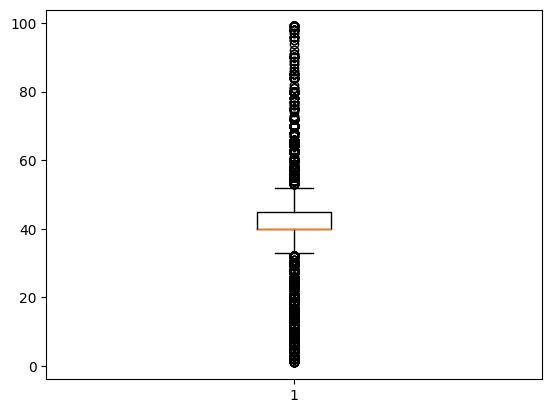

In [18]:
plt.boxplot(df.hours_per_week)  #outliers detected

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

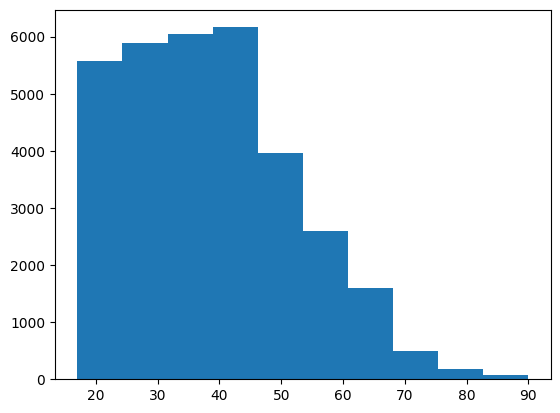

In [19]:
plt.hist(df.age)

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

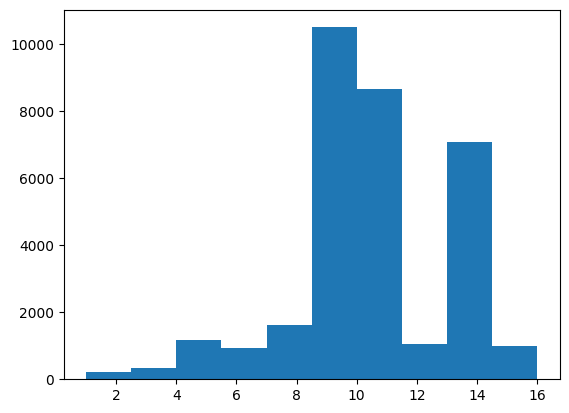

In [20]:
plt.hist(df.education_num)

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

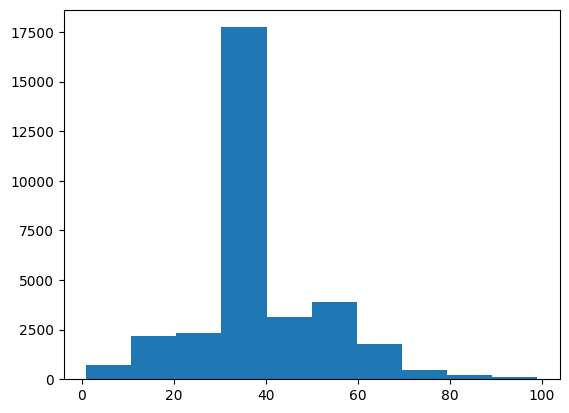

In [21]:
plt.hist(df.hours_per_week)

We can interpret that our data is not normally distributed

In [22]:
# @title DIFFERENT SCALING TECHNIQUES
df_numerical=df.select_dtypes(include='number')
df_numerical

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [23]:
df__standard=StandardScaler().fit_transform(df_numerical)
df__standard
df_standard=pd.DataFrame(df__standard,columns=df_numerical.columns)   #creating transform dataset
df_standard

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [24]:
df_minmax=MinMaxScaler().fit_transform(df_numerical)
df_minmax  # minmax scaler

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [25]:
df_minmax=pd.DataFrame(df_minmax,columns=df_numerical.columns)
df_minmax

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


**Use standard scaler when**
 1.data follows a normal distribution
 2. we want to preserve the orignal distribution shape and outliers
 3. scales data will have a mean of 0 and standard deviation of 1

**Use minmax scaler when**
 1. data dosen't follow normal distribution
 2. when we want our data to be scaled in a range of [0-1]
 3. it will reduce the effect of outliers

In [26]:
# @title ENCODING TECHNIQUES
#applying one hot coding to categories having less than 5 values
#applying label encoding to columns having more than 5 unique values

In [27]:
df_category=df.select_dtypes(include='object')
df_category

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [28]:
df_ohe=df[['sex','race']]
df_ohe

,sex,race
0,Male,White
1,Male,White
2,Male,White
3,Male,Black
4,Female,Black
...,...,...
32556,Female,White
32557,Male,White
32558,Female,White
32559,Male,White


In [29]:
df_ohe=pd.get_dummies(df_ohe)

In [30]:
df_ohe

,sex_ Female,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,False,True,False,False,False,False,True
1,False,True,False,False,False,False,True
2,False,True,False,False,False,False,True
3,False,True,False,False,True,False,False
4,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...
32556,True,False,False,False,False,False,True
32557,False,True,False,False,False,False,True
32558,True,False,False,False,False,False,True
32559,False,True,False,False,False,False,True


In [31]:
df_ohe=df_ohe.replace({True:1,False:0})

In [32]:
df_ohe

,sex_ Female,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0
4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...
32556,1,0,0,0,0,0,1
32557,0,1,0,0,0,0,1
32558,1,0,0,0,0,0,1
32559,0,1,0,0,0,0,1


In [33]:
#applying label encoder
df_le=df[['workclass','education','marital_status','occupation','relationship','native_country']]
df_le

,workclass,education,marital_status,occupation,relationship,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba
...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,United-States


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_le.columns:
    df_le[column] = labelencoder.fit_transform(df_le[column])

# Display the transformed DataFrame
df_le


,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5
...,...,...,...,...,...,...
32556,4,7,2,13,5,39
32557,4,11,2,7,0,39
32558,4,11,6,1,4,39
32559,4,11,4,1,3,39



*Discussing one hot encoding and label encoding pros and cons:*

**pros**
1.  easy to implement
2.  we get seperate columns for each value

**cons**
1. it increases number of columns
2. makes complicate to handle data


*Discussing pros and cons of label encoding:*

**pros**
1. it convertes category data to numerical data without creating seperate columns
2. save space and avoid increasing dimensions
3. simple to implement

**cons**
1. sensitive to ordering
2. it loses relation between categories as integer values assigned are arbitary

In [41]:
df['principle_amount']=df['capital_gain']-df['capital_loss']

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,principle_amount
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [42]:
df['age_hours_ratio'] = df['age'] / df['hours_per_week']  #2nd feature
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,principle_amount,age_hours_ratio
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174,0.975000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,3.846154
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0.950000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1.325000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0.710526
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,1.000000
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1.450000
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1.100000


In [43]:
# Apply log transformation to 'capital_gain'
import numpy as np
df['capital_gain_log'] = np.log(df['capital_gain'] + 1)

In [44]:
# @title FEATURE SELECTION
from sklearn.ensemble import IsolationForest

In [45]:
iso= IsolationForest(random_state=42,contamination=0.1)
iso.fit(df_standard)

IsolationForest(contamination=0.1, random_state=42)

In [46]:
outlier=iso.predict(df_standard)

In [47]:
outlier

array([ 1,  1,  1, ...,  1,  1, -1])

In [48]:
# removing outliers
df_cleaned=df[outlier!=-1]

In [49]:
# Print the shape of the cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (32561, 18)
Cleaned dataset shape: (29305, 18)


In [50]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.0 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=6d73ee034058b5fbbcb62eec151da419ca8437b36a5f0d7d7c3aae612d93cadd
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which i

In [51]:
# Compute Pearson correlation coefficient manually
correlation_matrix = df_cleaned[df_numerical.columns].corr()

In [52]:
# Square the absolute values of the correlation coefficients to get the PPS
pps_matrix = correlation_matrix.applymap(lambda x: np.square(abs(x)))

print(pps_matrix)

                     age        fnlwgt  education_num  capital_gain  \
age             1.000000  5.758684e-03       0.001661      0.005468   
fnlwgt          0.005759  1.000000e+00       0.001119      0.000356   
education_num   0.001661  1.119007e-03       1.000000      0.008629   
capital_gain    0.005468  3.556044e-04       0.008629      1.000000   
capital_loss    0.000301  9.771551e-07       0.000128      0.000086   
hours_per_week  0.017964  3.431244e-04       0.016488      0.003304   

                capital_loss  hours_per_week  
age             3.009773e-04    1.796366e-02  
fnlwgt          9.771551e-07    3.431244e-04  
education_num   1.284214e-04    1.648765e-02  
capital_gain    8.590210e-05    3.304435e-03  
capital_loss    1.000000e+00    5.531940e-07  
hours_per_week  5.531940e-07    1.000000e+00  


In [53]:
#THANK YOU!!!